<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression-Trees-and-Model-Optimization---Lab" data-toc-modified-id="Regression-Trees-and-Model-Optimization---Lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression Trees and Model Optimization - Lab</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Boston-Housing-Dataset---Again-!" data-toc-modified-id="Boston-Housing-Dataset---Again-!-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Boston Housing Dataset - Again !</a></span></li><li><span><a href="#Identify-Features-and-Target-Data" data-toc-modified-id="Identify-Features-and-Target-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Identify Features and Target Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Features" data-toc-modified-id="Features-1.4.0.1"><span class="toc-item-num">1.4.0.1&nbsp;&nbsp;</span>Features</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.4.0.2"><span class="toc-item-num">1.4.0.2&nbsp;&nbsp;</span>Target</a></span></li></ul></li></ul></li><li><span><a href="#Inspect-Correlations" data-toc-modified-id="Inspect-Correlations-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Inspect Correlations</a></span></li><li><span><a href="#Create-Evaluation-Metrics" data-toc-modified-id="Create-Evaluation-Metrics-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Create Evaluation Metrics</a></span></li><li><span><a href="#Supervised-Training" data-toc-modified-id="Supervised-Training-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Supervised Training</a></span></li><li><span><a href="#Grow-a-Vanilla-Regression-Tree" data-toc-modified-id="Grow-a-Vanilla-Regression-Tree-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Grow a Vanilla Regression Tree</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#More-Hyperparameter-Tuning" data-toc-modified-id="More-Hyperparameter-Tuning-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>More Hyperparameter Tuning</a></span></li></ul></li><li><span><a href="#Run-the-&quot;Optimized&quot;-Model" data-toc-modified-id="Run-the-&quot;Optimized&quot;-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run the "Optimized" Model</a></span><ul class="toc-item"><li><span><a href="#Level-Up---Optional" data-toc-modified-id="Level-Up---Optional-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Level Up - Optional</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

# Regression Trees and Model Optimization - Lab

## Introduction

In this final lab, we'll see how to apply regression analysis using CART trees for regression while making use of some hyperparameter tuning to improve our model. For a comparison of predictive capabilities and computational cost, we'll work the "Boston Housing" dataset. This will allow us to compare different regression approaches in terms of their accuracy and cost involved. 

## Objectives
You will be able to:
- Apply predictive regression analysis with CART trees
- Get the data ready for modeling
- Tune the key hyper parameters based a various models developed during training 
- Study the impact of tree pruning on the quality of predictions

## Boston Housing Dataset - Again ! 

The dataset is available in the repo as `boston.csv`. 

- Load the Dataset and print its head and dimensions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [3]:
df = pd.read_csv('boston.csv')
print(df.info())
print('\n')
print(df.describe())
print('\n')
print(df.shape)
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
crim          506 non-null float64
zn            506 non-null float64
indus         506 non-null float64
chas          506 non-null int64
nox           506 non-null float64
rm            506 non-null float64
age           506 non-null float64
dis           506 non-null float64
rad           506 non-null int64
tax           506 non-null int64
ptratio       506 non-null float64
black         506 non-null float64
lstat         506 non-null float64
medv          506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB
None


       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.11587

Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2

## Identify Features and Target Data
In this lab, we'll use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. You'll find a brief description of each predictor below:

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

#### Target
- `MEDV`', the median value of the home. 


- Create dataframes for features and target as shown above. 
- Inspect the contents for validity 

In [4]:
target = df['medv']
features = df[['rm', 'lstat', 'ptratio']]
print(df.medv.describe())
features.head()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64


rm  lstat  ptratio
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7

## Inspect Correlations 

- Use scatter plots to show the correlation between chosen features and target variable
- Comment on each scatter plot 

In [ ]:
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], target, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')
    plt.tight_layout()

## Create Evaluation Metrics

- Create a function `performance(true, predicted)` to calculate and return the r-sqaured score and MSE for two equal sized arrays showing true and predicted values
- TEst the function with given data 

In [5]:
# Evaluation Metrics
#Â Import metrics

def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    r2 = r2_score(y_true,y_predict)
    mse = mean_squared_error(y_true,y_predict)

    return [r2, mse]

# Calculate the performance - TEST
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.4719999999999998]

[0.9228556485355649, 0.4719999999999998]

## Supervised Training 
- For supervised learning, split the `features` and `target` datasets into training/test data (80/20). 
- For reproducibility, use `random_state=42`

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Grow a Vanilla Regression Tree

- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above.
- Use `random_state=45` for tree instance
- Record your observations

In [8]:
regressor = DecisionTreeRegressor(random_state=45)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
score = performance(y_test, y_pred)
score[0], score[1]
# (0.4712438851035674, 38.7756862745098)  - R2, MSE

(0.47097115950374013, 38.795686274509805)

## Hyperparameter Tuning 

- Find the best tree depth for a depth range: 1-30
- Run the regressor repeatedly in a for loop for each depth value. 
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures, for all runs.
- Comment on the output 

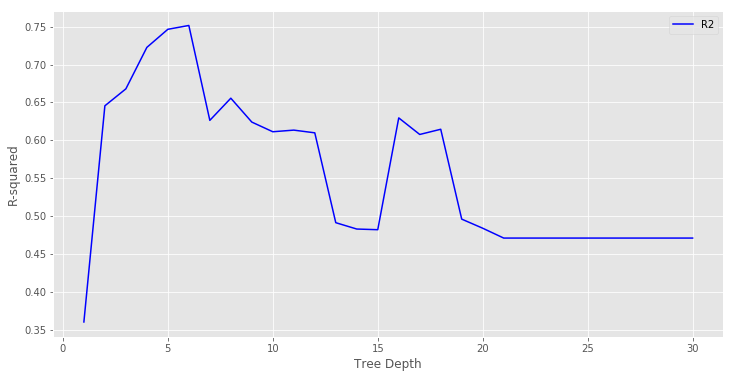

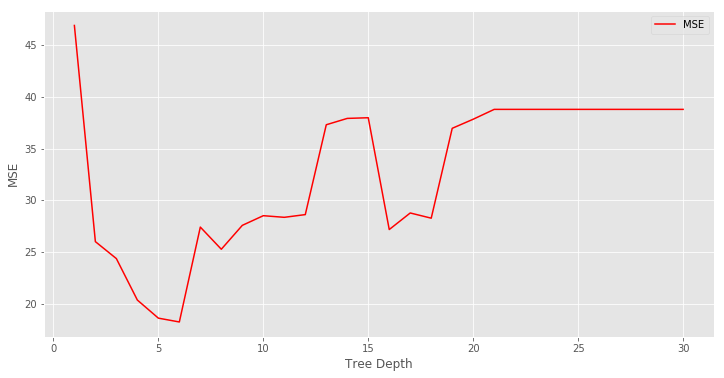

In [9]:
plt.style.use('ggplot')

# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=45)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(max_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()

## More Hyperparameter Tuning 

- Repeat the above process for `min_samples_split` parameter

- Use a a range of values from 2-10 for this parameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above

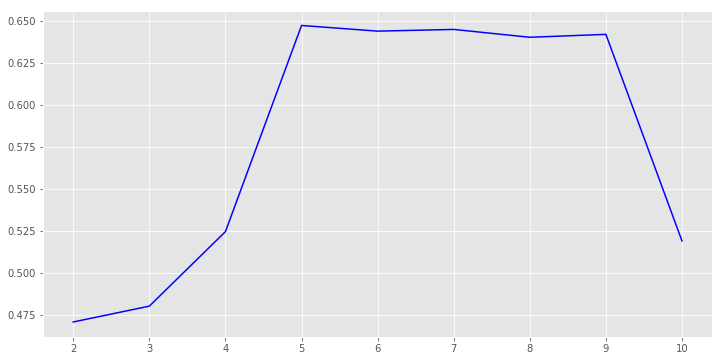

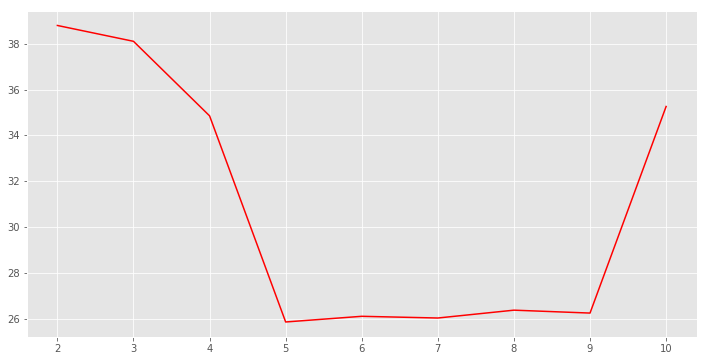

In [10]:
# Identify the optimal minimum split size for given data
min_samples_splits = np.arange(2,11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split), random_state=45)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, mse_results, 'r', label='MSE')
plt.show()

# Run the "Optimized" Model 

- Use the best values for max_depth and min_samples_split found in previous runs and run an optimized model with these values. 
- Calculate the performance and comment on the output 

In [11]:
regressor = DecisionTreeRegressor(min_samples_split=6, max_depth=6, random_state=45)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
score = performance(y_test, y_pred)
score[0], score[1], regressor

(0.7510017608643338,
 18.259982876077185,
 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=45, splitter='best'))

## Level Up - Optional 

- How about bringing in some more features from the original dataset which may be good predictors?
- Also , try tuning more hyperparameters like `max-features` to find the optimal version of the model. 


## Summary 

In this lab, we looked at applying a decision tree based regression analysis on the Boston Housing Dataset. We saw how to train various models to find the optimal values for pruning and limiting the growth of the trees. We also looked at how to extract some rules from visualizing trees , that might be used for decision making later. 